# Analysis - exp40

- Parameter sensivitity testing for DQN. Learning rate and epsilon (no anneal).

In [129]:
import os
import csv
import numpy as np
import torch as th

from glob import glob
from pprint import pprint

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set(font_scale=1.5)
sns.set_style('ticks')

matplotlib.rcParams.update({'font.size': 16})
matplotlib.rc('axes', titlesize=16)

from notebook_helpers import load_params
from notebook_helpers import load_monitored
from notebook_helpers import join_monitored
from notebook_helpers import score_summary

def load_data(path, run_index=(0, 20)):
    runs = range(run_index[0], run_index[1]+1)
    exps = []
    for r in runs:
        file = os.path.join(path, "run_{}_monitor.csv".format(int(r)))
        try:
            mon = load_monitored(file)
        except FileNotFoundError:
            mon = None
        exps.append(mon)
    return exps

# Load data

In [130]:
path = "/Users/qualia/Code/azad/data/wythoff/exp40/"
exp_40 = load_data(path, run_index=(0, 99))
grid_40 = load_params(os.path.join(path, "grid.csv"))

In [131]:
print(grid_40.keys())

dict_keys(['row_code', 'device_code', 'epsilon', 'learning_rate'])


In [132]:
print(len(grid_40['row_code']))
print(len(exp_40))

100
100


In [133]:
pprint(exp_40[0].keys())
pprint(len(exp_40[0]['loss']))
pprint(exp_40[0]['score'][:20])

dict_keys(['file', 'episode', 'loss', 'score'])
191
[0.4619254156963563,
 0.477298975247889,
 0.4863151171177694,
 0.4863151171177694,
 0.4863151171177694,
 0.48995827231551575,
 0.49329187837881305,
 0.49640051716176514,
 0.499229727739508,
 0.5019220410312311,
 0.5044375862785481,
 0.5068787804348114,
 0.5138134334519731,
 0.5159365188954143,
 0.518005166250562,
 0.518005166250562,
 0.5217862184069707,
 0.5236114618481654,
 0.5236114618481654,
 0.5252655887167482]


# Plots

## Learning rates

Curves for each lr. We tabulate over all other metaparams.

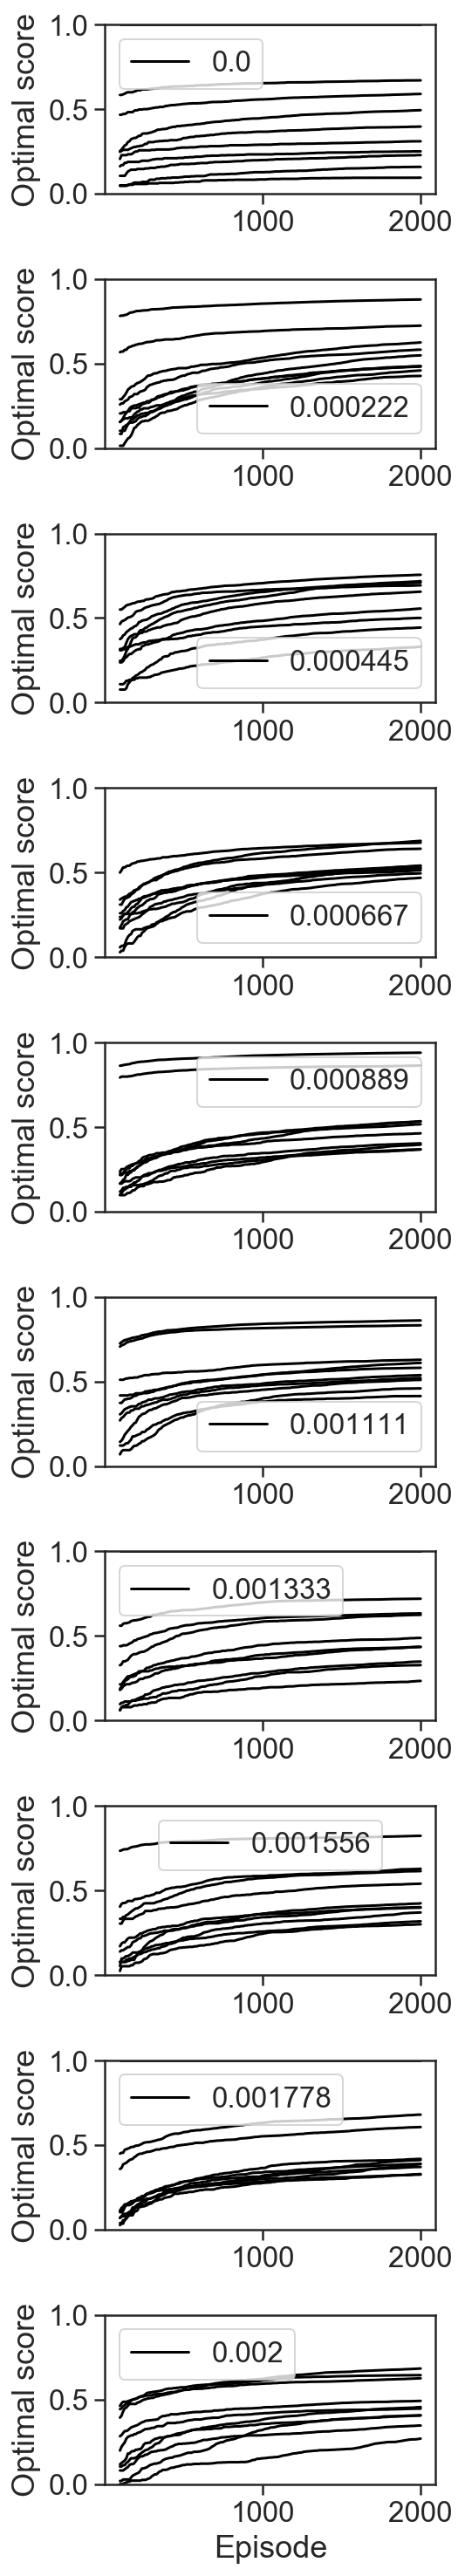

In [138]:
plt.figure(figsize=(4, 20.5))

lrs = sorted(set(grid_40['learning_rate']))
for n, lr in enumerate(lrs):
    plt.subplot(len(lrs), 1, n+1)
    index = lr == np.asarray(grid_40['learning_rate'])
    index = np.arange(0,len(index))[index]
    first = True
    for r, mon in enumerate(exp_40):
        if r in index:
            if mon is not None:
                _ = plt.plot(mon['episode'], mon['score'], label=lr, color='black')
                _ = plt.ylim(0, 1)
                _ = plt.ylabel("Optimal score")
                _ = plt.tight_layout()
                if first:
                    plt.legend()
                    first = False
                                    
_ = plt.xlabel("Episode")

Histograms of final values

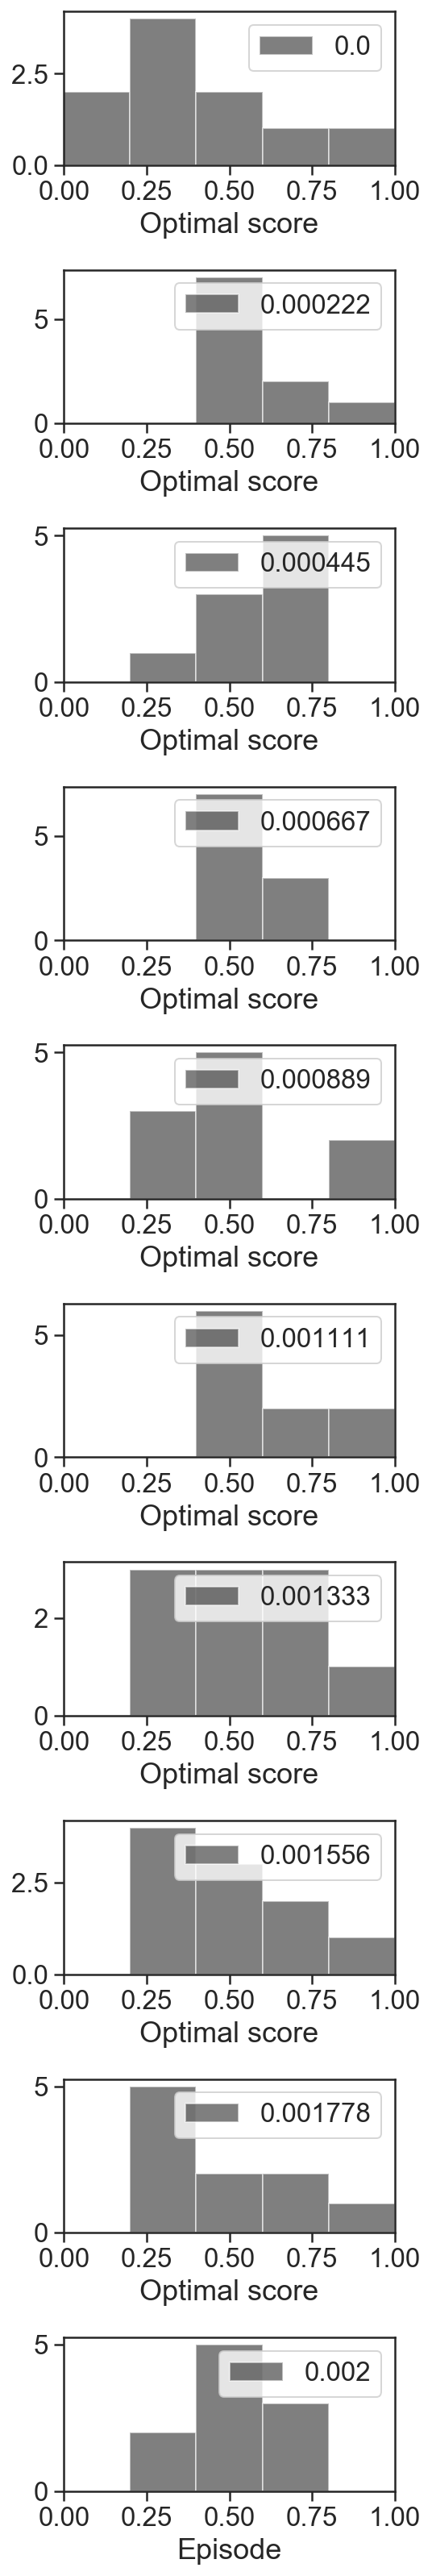

In [140]:
plt.figure(figsize=(4, 22.5))

lrs = sorted(set(grid_40['learning_rate']))
for n, lr in enumerate(lrs):
    plt.subplot(len(lrs), 1, n+1)
    index = lr == np.asarray(grid_40['learning_rate'])
    index = np.arange(0,len(index))[index]
    first = True
    data = []
    for r, mon in enumerate(exp_40):
        if r in index:
            if mon is not None:
                data.append(np.max(mon['score']))                
    _ = plt.hist(data, label=lr, alpha=0.5, color="black", bins=5, range=(0,1))        
    _ = plt.xlabel("Optimal score")
    _ = plt.xlim(0,1)
    _ = plt.tight_layout()
    plt.legend()
                                    
_ = plt.xlabel("Episode")

## Epsilon

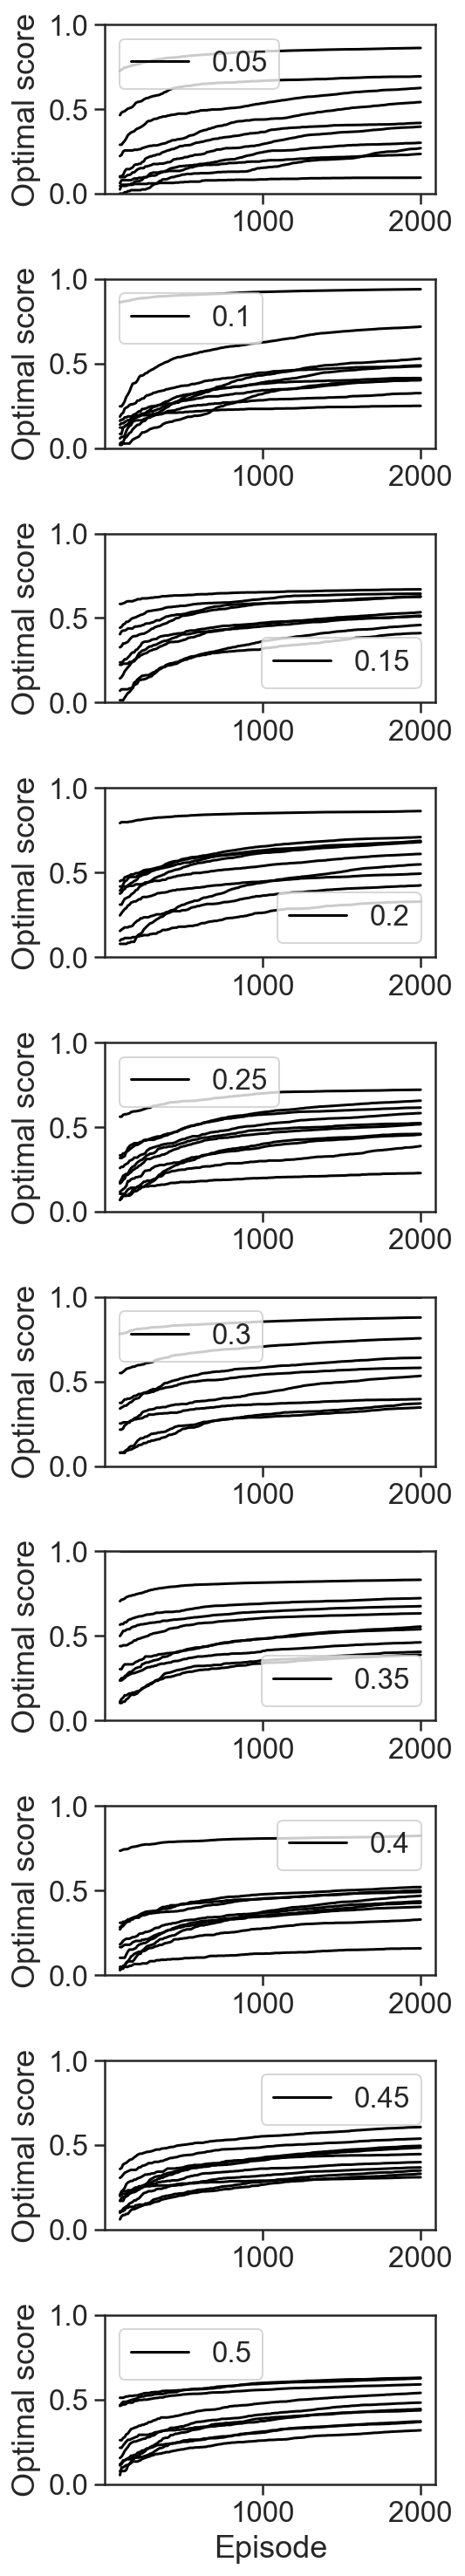

In [141]:
plt.figure(figsize=(4, 20.5))

eps = sorted(set(grid_40['epsilon']))
for n, ep in enumerate(eps):
    plt.subplot(len(lrs), 1, n+1)
    index = ep == np.asarray(grid_40['epsilon'])
    index = np.arange(0,len(index))[index]
    first = True
    for r, mon in enumerate(exp_40):
        if r in index:
            if mon is not None:
                _ = plt.plot(mon['episode'], mon['score'], label=ep, color='black')
                _ = plt.ylim(0, 1)
                _ = plt.ylabel("Optimal score")
                _ = plt.tight_layout()
                if first:
                    plt.legend()
                    first = False
                                    
_ = plt.xlabel("Episode")

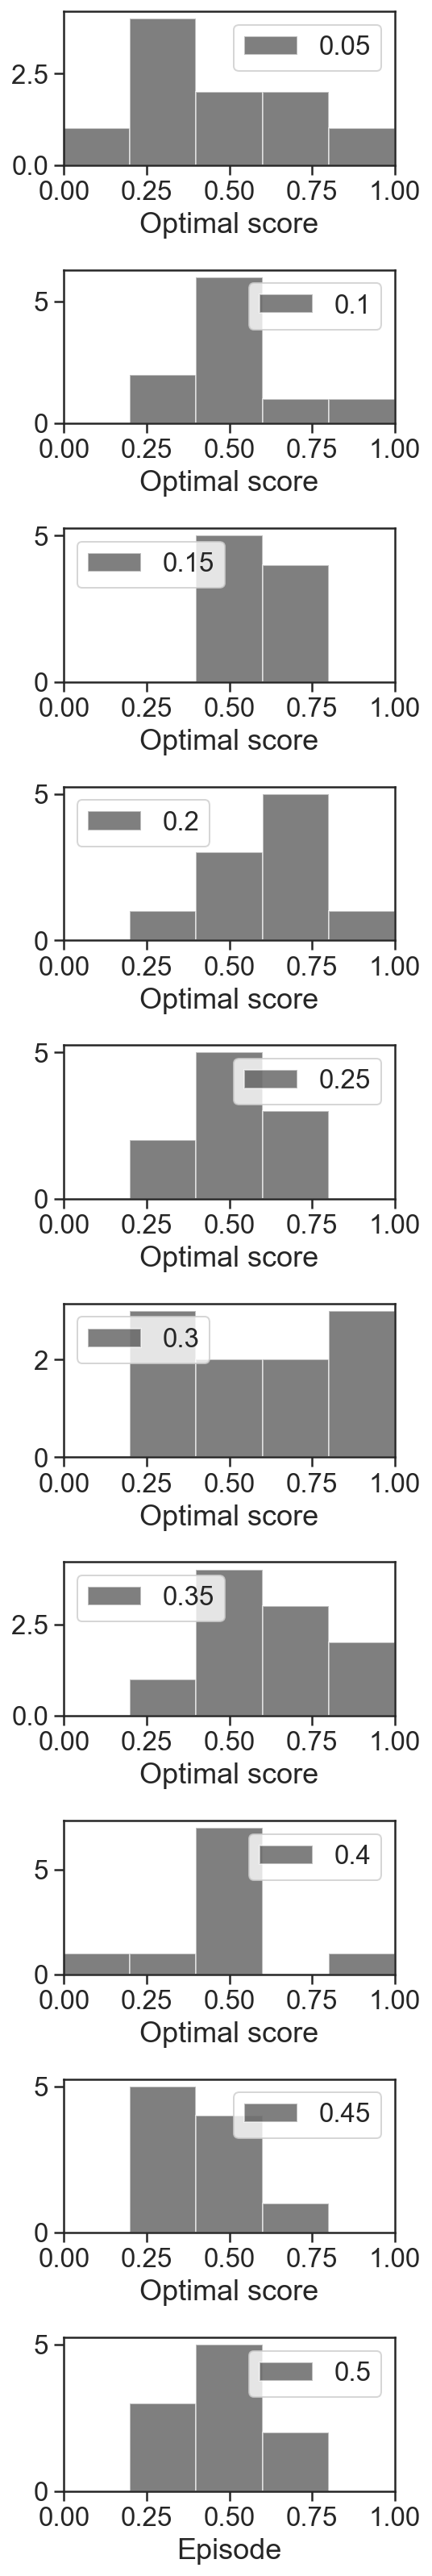

In [142]:
plt.figure(figsize=(4, 22.5))

eps = sorted(set(grid_40['epsilon']))
for n, ep in enumerate(eps):
    plt.subplot(len(lrs), 1, n+1)
    index = ep == np.asarray(grid_40['epsilon'])
    index = np.arange(0,len(index))[index]
    first = True
    data = []
    for r, mon in enumerate(exp_40):
        if r in index:
            if mon is not None:
                data.append(np.max(mon['score']))                
    _ = plt.hist(data, label=ep, alpha=0.5, color="black", bins=5, range=(0,1))        
    _ = plt.xlabel("Optimal score")
    _ = plt.xlim(0,1)
    _ = plt.tight_layout()
    plt.legend()
                                    
_ = plt.xlabel("Episode")

# Joint 

Plot ranked max scores DQN for HP sweep: `learning_rate` and `epsilon`.

No handles with labels found to put in legend.


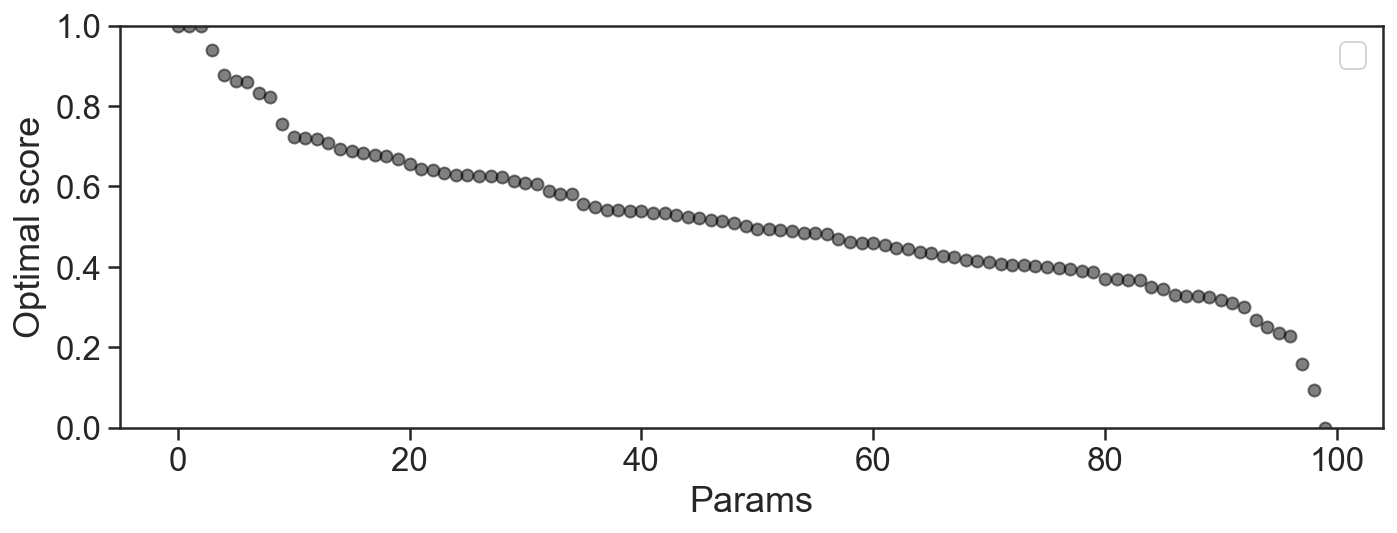

In [143]:
scores = []
for n, exp in enumerate(exp_40):
    if exp is not None:
        x = np.max(exp['score'])
    else:
        x = 0
    scores.append(x)

scores = np.asarray(scores)
ranks = np.argsort(1 - scores).tolist()

plt.figure(figsize=(10, 4))
_ = plt.scatter(range(len(scores)), scores[ranks], alpha=0.5, color="black")        
_ = plt.ylabel("Optimal score")
_ = plt.xlabel("Params")
_ = plt.ylim(0,1)
_ = plt.tight_layout()
plt.legend()

Top 10:

In [144]:
pprint(("score", "learning_rate", "epsilon"))
pprint([(scores[b], grid_40['learning_rate'][b], grid_40['epsilon'][b]) for b in ranks[:10]])

('score', 'learning_rate', 'epsilon')
[(1.0, 0.0, 0.35),
 (1.0, 0.001778, 0.3),
 (1.0, 0.001333, 0.3),
 (0.9393386211726319, 0.000889, 0.1),
 (0.878515854265969, 0.000222, 0.3),
 (0.8633694874726052, 0.000889, 0.2),
 (0.8610649179784786, 0.001111, 0.05),
 (0.8324130934588808, 0.001111, 0.35),
 (0.8234103699599776, 0.001556, 0.4),
 (0.7555145531030987, 0.000445, 0.3)]
